In [1]:
import matplotlib.pyplot as plt
import pyvista as pv
import numpy as np
import json
import glob

import os, sys, time
sys.path.insert(0,"/home/nico/Documents/TEAR/Codes_TEAR/PythonCodes/LibFolder")
from Lib_GeneralFunctions import *
from Lib_PyVista import *

In [6]:
folder='/home/nico/Documents/Documents/SharedWolfel/PaperData/220120FieldData/'

RunTest='TEAR18_TPV3_T0_P3_025x025_A12phi65_Delta1.001_3s/'
#RunTest='Kos_Sig_P3_25x25_2.5/'
#RunTest = 'TPV_T0_P3_25x25_1/'



TimeStep = 9200
Stressfilename= 'Sigma-Aligned-step-{TimeStep:04d}.vtu'.format(TimeStep=TimeStep)
JSONfilename= 'step-{TimeStep:04d}_wavefield.json'.format(TimeStep=TimeStep)

In [7]:
print(sorted(glob(folder+RunTest+'step-*.vts')))

[]


In [8]:
OutFolder = folder + RunTest + 'Out/'
CreateFolder(OutFolder)

In [9]:
print(JSONfilename)
with open(folder+RunTest+JSONfilename, 'r') as json_file:
  LoadedJson = json.load(json_file)
LoadedJson['se2wave']

step-9200_wavefield.json


{'time': 2.99941412859,
 'step': 9200,
 'spatial_dimension': 2,
 'mx': 800,
 'my': 800,
 'nx': 2401,
 'ny': 2401,
 'basis_degree': 3,
 'fields': ['u', 'v'],
 'data': {'description': 'wavefield',
  'fields': ['u', 'v'],
  'writer': 'petsc_binary',
  'type': 'Vec',
  'filename': 'step-9200_wavefield.pbin',
  'endian': 'big'},
 'version': [1, 0, 0]}

In [10]:
reader = pv.get_reader(folder+RunTest+Stressfilename)
StressMesh = reader.read()
data = StressMesh.get_array('sigma_xy',preference='point')
StressMesh

UnstructuredGrid (0x1471ae840820)
  N Cells:	5760000
  N Points:	10240000
  X Bounds:	-1.000e+04, 1.000e+04
  Y Bounds:	-1.000e+04, 1.000e+04
  Z Bounds:	0.000e+00, 0.000e+00
  N Arrays:	3

In [11]:
Xmatrix,Ymatrix,Zmatrix = pyvistaArraySorting(StressMesh, data, 3)

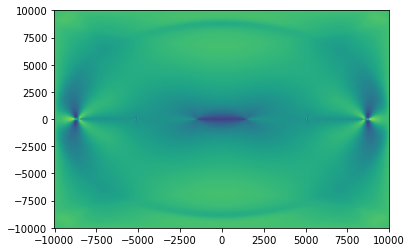

In [12]:
plt.pcolormesh(Xmatrix,Ymatrix,Zmatrix,shading="auto")

In [13]:
SavePickleFile(OutFolder, "StressInAPickle", [Xmatrix,Ymatrix,Zmatrix])

--------------------------------

In [ ]:
mx=2; nqp=4
TestMatrix = np.zeros((2*nqp,nqp*2))
TestMatrix

In [ ]:
Test=np.array([1,2,3,4,9,10,11,12,17,18,19,20,25,26,27,28,5,6,7,8,13,14,15,16,21,22,23,24,29,30,31,32])

np.hsplit(Test,mx)

TestMatrix[:4,0:nqp*mx]=np.stack([i.reshape(nqp,-1) for i in np.hsplit(Test,mx)],axis=1).reshape(-1,nqp*mx)
TestMatrix[4:8,0:nqp*mx]=np.stack([i.reshape(nqp,-1) for i in np.hsplit(Test,mx)],axis=1).reshape(-1,nqp*mx)
TestMatrix